In [123]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats

In the present notebook we plot the mass distribution and the semi major axes distribution for both Young and Nuclear star clusters

# IMPORT DATA YOUNG STAR CLUSTER

## YSC

In [2]:
# columns of the dataframe: mass, position (x, y, z), velocity (vx, vy, vz)
names = ['m', 'x', 'y', 'z', 'vx', 'vy', 'vz']

# read the file and import it as pandas dataframe
data_ysc = pd.read_csv("YSC_N10000_endsim.dat", sep=",", header=0, names=names)

# create a new column with the number of the simulation:
#since each simulation has 3 BHs (i.e. 3 rows with mass position and velocities), the number of the simulation is increased every 3 rows
data_ysc['simulation'] = [(i//3+1) for i in range(len(data_ysc))]
data_ysc

,m,x,y,z,vx,vy,vz,simulation
0,50.279995,0.113208,0.034386,0.022581,-1.554359,73.003181,95.337515,1
1,42.430295,0.112654,0.034437,0.022792,39.727262,-74.967304,-105.389632,1
2,7.922303,-1.321844,-0.402669,-0.265383,-202.906440,-61.814698,-40.626653,1
3,42.605799,-0.019820,-0.069529,0.122362,241.117960,80.541936,27.483283,2
4,30.012587,-0.019903,-0.069464,0.122363,-349.486512,-139.539435,5.347029,2
...,...,...,...,...,...,...,...,...
29995,3.098252,-5.563291,7.298985,-13.133733,-830.689000,1089.850835,-1961.070821,9999
29996,63.138950,0.160927,-0.211130,0.380030,128.713258,-73.831570,41.613869,9999
29997,39.670667,0.069257,0.330360,0.923332,371.029933,-362.176070,-76.691799,10000
29998,32.617436,0.069270,0.330361,0.923332,-428.369489,549.682340,398.450981,10000


In [3]:
data_ysc

,m,x,y,z,vx,vy,vz,simulation
0,50.279995,0.113208,0.034386,0.022581,-1.554359,73.003181,95.337515,1
1,42.430295,0.112654,0.034437,0.022792,39.727262,-74.967304,-105.389632,1
2,7.922303,-1.321844,-0.402669,-0.265383,-202.906440,-61.814698,-40.626653,1
3,42.605799,-0.019820,-0.069529,0.122362,241.117960,80.541936,27.483283,2
4,30.012587,-0.019903,-0.069464,0.122363,-349.486512,-139.539435,5.347029,2
...,...,...,...,...,...,...,...,...
29995,3.098252,-5.563291,7.298985,-13.133733,-830.689000,1089.850835,-1961.070821,9999
29996,63.138950,0.160927,-0.211130,0.380030,128.713258,-73.831570,41.613869,9999
29997,39.670667,0.069257,0.330360,0.923332,371.029933,-362.176070,-76.691799,10000
29998,32.617436,0.069270,0.330361,0.923332,-428.369489,549.682340,398.450981,10000


# Add a column with the enrgy to the dataframe

In this chunk of code we compute the binding energy between couples of black holes as we did in the previous notebook.

In [4]:
%%time

#compute, in order 01 12 20
N = len(data_ysc)
m = data_ysc['m'].values
x = data_ysc['x'].values
y = data_ysc['y'].values
z = data_ysc['z'].values
vx = data_ysc['vx'].values
vy = data_ysc['vy'].values
vz = data_ysc['vz'].values

#mprod
m_prod = np.zeros(N)
m_prod[0::3] = m[0::3] * m[1::3]
m_prod[1::3] = m[1::3] * m[2::3]
m_prod[2::3] = m[2::3] * m[0::3]

#reduced mass
mu = np.zeros(N)
mu[0::3] = m_prod[0::3] / (m[0::3] + m[1::3])
mu[1::3] = m_prod[1::3] / (m[1::3] + m[2::3])
mu[2::3] = m_prod[2::3] / (m[2::3] + m[0::3])

#pos_rel
pos_rel = np.zeros(N)
pos_rel[0::3] = np.sqrt((x[0::3] - x[1::3])**2 + (y[0::3] - y[1::3])**2 + (z[0::3] - z[1::3])**2)
pos_rel[1::3] = np.sqrt((x[1::3] - x[2::3])**2 + (y[1::3] - y[2::3])**2 + (z[1::3] - z[2::3])**2)                      
pos_rel[2::3] = np.sqrt((x[2::3] - x[0::3])**2 + (y[2::3] - y[0::3])**2 + (z[2::3] - z[0::3])**2)
                                                                          
#v2_rel                                                                         
v2_rel = np.zeros(N)
v2_rel[0::3] = (vx[0::3] - vx[1::3])**2 + (vy[0::3] - vy[1::3])**2 + (vz[0::3] - vz[1::3])**2                                      
v2_rel[1::3] = (vx[1::3] - vx[2::3])**2 + (vy[1::3] - vy[2::3])**2 + (vz[1::3] - vz[2::3])**2
v2_rel[2::3] = (vx[2::3] - vx[0::3])**2 + (vy[2::3] - vy[0::3])**2 + (vz[2::3] - vz[0::3])**2
         
# gravitaional constant
#G = 4.30091e-3         # in m^3 * kg^-1 * s^-2
G=1

#binding energy
BE_y = np.zeros(N) 
BE_y[0::3] = (0.5 * mu[0::3] * v2_rel[0::3]) - (G * m_prod[0::3] / pos_rel[0::3])
BE_y[1::3] = (0.5 * mu[1::3] * v2_rel[1::3]) - (G * m_prod[1::3] / pos_rel[1::3])
BE_y[2::3] = (0.5 * mu[2::3] * v2_rel[2::3]) - (G * m_prod[2::3] / pos_rel[2::3])

data_ysc['BE'] = BE_y  

data_ysc

CPU times: user 4.86 ms, sys: 2.25 ms, total: 7.11 ms
Wall time: 6.9 ms


,m,x,y,z,vx,vy,vz,simulation,BE
0,50.279995,0.113208,0.034386,0.022581,-1.554359,73.003181,95.337515,1,-2.845552e+06
1,42.430295,0.112654,0.034437,0.022792,39.727262,-74.967304,-105.389632,1,2.108643e+05
2,7.922303,-1.321844,-0.402669,-0.265383,-202.906440,-61.814698,-40.626653,1,2.639319e+05
3,42.605799,-0.019820,-0.069529,0.122362,241.117960,80.541936,27.483283,2,-8.583611e+06
4,30.012587,-0.019903,-0.069464,0.122363,-349.486512,-139.539435,5.347029,2,6.896483e+05
...,...,...,...,...,...,...,...,...,...
29995,3.098252,-5.563291,7.298985,-13.133733,-830.689000,1089.850835,-1961.070821,9999,9.281354e+06
29996,63.138950,0.160927,-0.211130,0.380030,128.713258,-73.831570,41.613869,9999,-1.139045e+07
29997,39.670667,0.069257,0.330360,0.923332,371.029933,-362.176070,-76.691799,10000,-8.190442e+07
29998,32.617436,0.069270,0.330361,0.923332,-428.369489,549.682340,398.450981,10000,1.261396e+07


Having computed the binding energy, the next step is to identify which kind of event occurs for each simulation.
In order to achieve this, we exploit the bindin energy computed before.

In [5]:
def identify(energies):
    '''
    Function to identify which kind of event occurs
    
    INPUT:
    - list of energies of the three black holes
    
    OUTPUT:
    - string with the name of the event
    '''
    
    # assign the three energy to different variables
    e1, e2, e3 = energies[0], energies[1], energies[2]
    
    # check which case is satisfied and return the event according to theory
    if e1 < 0 and e2 > 0 and e3 > 0: return "fly_by"
    elif e1 > 0 and e2 > 0 and e3 < 0: return "exchange1"
    elif e1 > 0 and e2 < 0 and e3 > 0: return "exchange0"
    elif e1 > 0 and e2 > 0 and e3 > 0: return "ionization"
    elif e1 == 0 or e2 == 0 or e3 == 0: return "merge"
    else: return "unknown"

# create empty list of events
events_y = []

#loop over binding energies with step equal to 3 (one step is one simulation)
for i in range(0, len(BE_y), 3):
    # create list of energies of the three black holes
    energies = [BE_y[i], BE_y[i+1], BE_y[i+2]]
    #identify the event and append it to the "events_y" list
    events_y.append(identify(energies))

# create a dictionary with the number of the simulation as key and the event as value
dic = { i: events_y[i-1] for i in range(1, len(events_y) +1 )}

# create a dataframe with the previous dictionary
df_y = pd.DataFrame(dic.items(), columns=['simulation', 'event'])
display(df_y)

# count number of simulation corresponding to each event
display(df_y.groupby("event").count())

,simulation,event
0,1,fly_by
1,2,fly_by
2,3,fly_by
3,4,fly_by
4,5,fly_by
...,...,...
9995,9996,exchange1
9996,9997,fly_by
9997,9998,fly_by
9998,9999,exchange1


,simulation
event,
exchange0,443
exchange1,1678
fly_by,7617
ionization,63
merge,11
unknown,188


# IMPORT DATA NUCLEAR STAR CLUSTER

## NSC

In [6]:
# columns of the dataframe: mass, position (x, y, z), velocity (vx, vy, vz)
names = ['m', 'x', 'y', 'z', 'vx', 'vy', 'vz']

# read the file and import it as pandas dataframe
data_nsc = pd.read_csv("NSC_N10000_endsim.dat", sep=",", header=0, names=names)

# create a new column with the number of the simulation:
#since each simulation has 3 BHs (i.e. 3 rows with mass position and velocities), the number of the simulation is increased every 3 rows
data_nsc['simulation'] = [(i//3+1) for i in range(len(data_nsc))]
data_nsc

,m,x,y,z,vx,vy,vz,simulation
0,39.689111,1.925802,0.350002,0.968372,1388.557614,3488.776785,508.139712,1
1,26.458487,1.925801,0.350003,0.968372,-1365.137573,-5102.896640,-401.311300,1
2,5.531187,-23.030705,-4.185689,-11.580781,-3433.465959,-624.011507,-1726.487191,1
3,40.231075,0.243291,1.429614,1.285392,54.994388,247.569907,193.816131,2
4,39.334465,0.240934,1.430763,1.285734,17.143140,180.294609,191.428339,2
...,...,...,...,...,...,...,...,...
29995,26.665704,-0.394099,-0.925569,0.727975,-94.481573,57.342166,-27.623747,9999
29996,20.899618,1.151319,2.703387,-2.126038,171.982950,403.838089,-317.588862,9999
29997,35.115653,0.082301,0.469057,0.113693,215.911607,-68.121620,10.964345,10000
29998,28.498771,0.082259,0.469373,0.113706,-238.441375,241.305907,24.625440,10000


In [7]:
%%time
#add a column with the enrgy to the dataframe

#compute, in order 01 12 20
N = len(data_nsc)
m = data_nsc['m'].values
x = data_nsc['x'].values
y = data_nsc['y'].values
z = data_nsc['z'].values
vx = data_nsc['vx'].values
vy = data_nsc['vy'].values
vz = data_nsc['vz'].values

#mprod
m_prod = np.zeros(N)
m_prod[0::3] = m[0::3] * m[1::3]
m_prod[1::3] = m[1::3] * m[2::3]
m_prod[2::3] = m[2::3] * m[0::3]

#reduced mass
mu = np.zeros(N)
mu[0::3] = m_prod[0::3] / (m[0::3] + m[1::3])
mu[1::3] = m_prod[1::3] / (m[1::3] + m[2::3])
mu[2::3] = m_prod[2::3] / (m[2::3] + m[0::3])

#pos_rel
pos_rel = np.zeros(N)
pos_rel[0::3] = np.sqrt((x[0::3] - x[1::3])**2 + (y[0::3] - y[1::3])**2 + (z[0::3] - z[1::3])**2)
pos_rel[1::3] = np.sqrt((x[1::3] - x[2::3])**2 + (y[1::3] - y[2::3])**2 + (z[1::3] - z[2::3])**2)                      
pos_rel[2::3] = np.sqrt((x[2::3] - x[0::3])**2 + (y[2::3] - y[0::3])**2 + (z[2::3] - z[0::3])**2)
                                                                          
#v2_rel                                                                         
v2_rel = np.zeros(N)
v2_rel[0::3] = (vx[0::3] - vx[1::3])**2 + (vy[0::3] - vy[1::3])**2 + (vz[0::3] - vz[1::3])**2                                      
v2_rel[1::3] = (vx[1::3] - vx[2::3])**2 + (vy[1::3] - vy[2::3])**2 + (vz[1::3] - vz[2::3])**2
v2_rel[2::3] = (vx[2::3] - vx[0::3])**2 + (vy[2::3] - vy[0::3])**2 + (vz[2::3] - vz[0::3])**2
         
# gravitaional constant
#G = 4.30091e-3         # in m^3 * kg^-1 * s^-2
G=1

#binding energy
BE_n = np.zeros(N) 
BE_n[0::3] = (0.5 * mu[0::3] * v2_rel[0::3]) - (G * m_prod[0::3] / pos_rel[0::3])
BE_n[1::3] = (0.5 * mu[1::3] * v2_rel[1::3]) - (G * m_prod[1::3] / pos_rel[1::3])
BE_n[2::3] = (0.5 * mu[2::3] * v2_rel[2::3]) - (G * m_prod[2::3] / pos_rel[2::3])

data_nsc['BE'] = BE_n  

data_nsc

CPU times: user 5.04 ms, sys: 3.15 ms, total: 8.18 ms
Wall time: 6.96 ms


,m,x,y,z,vx,vy,vz,simulation,BE
0,39.689111,1.925802,0.350002,0.968372,1388.557614,3488.776785,508.139712,1,-2.619919e+08
1,26.458487,1.925801,0.350003,0.968372,-1365.137573,-5102.896640,-401.311300,1,5.968872e+07
2,5.531187,-23.030705,-4.185689,-11.580781,-3433.465959,-624.011507,-1726.487191,1,1.096188e+08
3,40.231075,0.243291,1.429614,1.285392,54.994388,247.569907,193.816131,2,-5.391805e+05
4,39.334465,0.240934,1.430763,1.285734,17.143140,180.294609,191.428339,2,1.851208e+07
...,...,...,...,...,...,...,...,...,...
29995,26.665704,-0.394099,-0.925569,0.727975,-94.481573,57.342166,-27.623747,9999,1.611751e+06
29996,20.899618,1.151319,2.703387,-2.126038,171.982950,403.838089,-317.588862,9999,5.236748e+06
29997,35.115653,0.082301,0.469057,0.113693,215.911607,-68.121620,10.964345,10000,-7.644114e+05
29998,28.498771,0.082259,0.469373,0.113706,-238.441375,241.305907,24.625440,10000,3.244239e+06


In [8]:
# create empty list of events
events_n = []

#loop over binding energies with step equal to 3 (one step is one simulation)
for i in range(0, len(BE_n), 3):
    # create list of energies of the three black holes
    energies = [BE_n[i], BE_n[i+1], BE_n[i+2]]
    
    #identify the event and append it to the "events_y" list
    events_n.append(identify(energies))

# create a dictionary with the number of the simulation as key and the event as value
dic_n = { i: events_n[i-1] for i in range(1, len(events_n) +1 )}

# create a dataframe with the previous dictionary
df_n = pd.DataFrame(dic_n.items(), columns=['simulation', 'event'])
display(df_n)

# count number of simulation corresponding to each event
display(df_n.groupby("event").count())

,simulation,event
0,1,fly_by
1,2,fly_by
2,3,fly_by
3,4,fly_by
4,5,fly_by
...,...,...
9995,9996,fly_by
9996,9997,fly_by
9997,9998,fly_by
9998,9999,fly_by


,simulation
event,
exchange0,313
exchange1,727
fly_by,7928
ionization,1009
merge,22
unknown,1


# Plot Mass distribution

# fly-by

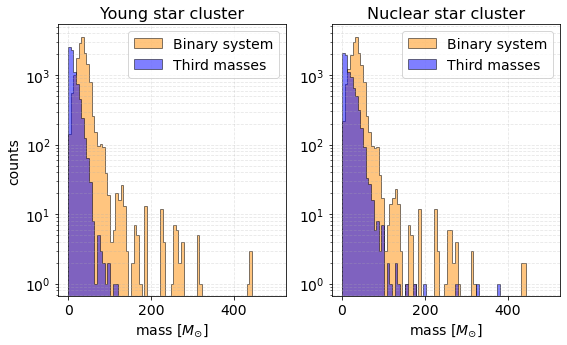

In [77]:
M_scale =  1#1.988e30 

# filter the dataframe in order to keep only fly by simulations (young)
fl_sim_y = df_y[df_y["event"] == "fly_by"]["simulation"].to_numpy()
fl_y = data_ysc[data_ysc["simulation"].isin(fl_sim_y)]

# arrays with masses of the tree black holes
BHs0_fl_y = fl_y[0::3]["m"].to_numpy()*M_scale
BHs1_fl_y = fl_y[1::3]["m"].to_numpy()*M_scale
BHs2_fl_y = fl_y[2::3]["m"].to_numpy()*M_scale

# filter the dataframe in order to keep only fly by simulations (nuclear)
fl_sim_n = df_n[df_n["event"] == "fly_by"]["simulation"].to_numpy()
fl_n = data_ysc[data_ysc["simulation"].isin(fl_sim_n)]

# arrays with masses of the tree black holes
BHs0_fl_n = fl_n[0::3]["m"].to_numpy()*M_scale
BHs1_fl_n = fl_n[1::3]["m"].to_numpy()*M_scale
BHs2_fl_n = fl_n[2::3]["m"].to_numpy()*M_scale



size = 14
nbins = 80
bins = np.linspace(0, 500, nbins)
#bins = np.logspace(-1, 2.7, nbins)

fig, (ax0, ax1) = plt.subplots( figsize=(9.0, 5.0) , nrows=1, ncols=2)

###########YOUNG############

# plot histogram of the first and second black holes (mass distribution)
ax0.hist(np.concatenate((BHs0_fl_y, BHs1_fl_y)), bins = bins, histtype = "step", ec = "k",
         linewidth = 1, color = "darkorange", fill = True, alpha = 0.5, label = "Binary system")

# plot histogram of the third black hole
ax0.hist(BHs2_fl_y, bins = bins, histtype = "step", ec = "k",
         linewidth = 1, color = "blue", fill = "True", alpha = 0.5, label = "Third masses")
ax0.set_yscale("log")
#ax0.set_xscale("log")
ax0.set_title("Young star cluster", size = size + 2)
ax0.set_xlabel(r"mass [$M_{\odot}$]", size = size)
ax0.set_ylabel("counts", size = size)
ax0.grid(which = "both", alpha = 0.3, linestyle = "--")
ax0.tick_params(axis = "x", labelsize = size)
ax0.tick_params(axis = "y", labelsize = size)
ax0.legend(fontsize = size, loc = "upper right")

###########NUCLEAR############
ax1.hist(np.concatenate((BHs0_fl_n, BHs1_fl_n)), bins = bins, histtype = "step", ec = "k",
         linewidth = 1, color = "darkorange", fill = "True", alpha = 0.5, label = "Binary system")
ax1.hist(BHs2_fl_n, bins = bins, histtype = "step", ec = "k",
         linewidth = 1, color = "blue", fill = "True", alpha = 0.5, label = "Third masses")

ax1.set_yscale("log")
#ax1.set_xscale("log")
ax1.set_title("Nuclear star cluster", size = size + 2)
ax1.set_xlabel(r"mass [$M_{\odot}$]", size = size)

ax1.grid(which = "both", alpha = 0.3, linestyle = "--")
ax1.tick_params(axis = "x", labelsize = size)
ax1.tick_params(axis = "y", labelsize = size)
ax1.legend(fontsize = size, loc = "upper right")



plt.show()
fig.savefig("masses_fl.pdf", transparent = True, bbox_inches = 'tight', pad_inches = 0)

The plot above shows the comparison between the mass of the BHs composing the binary system and the third mass for a fly by event and for both kind of clusters.

# exchanges (distributions at the initial instant)

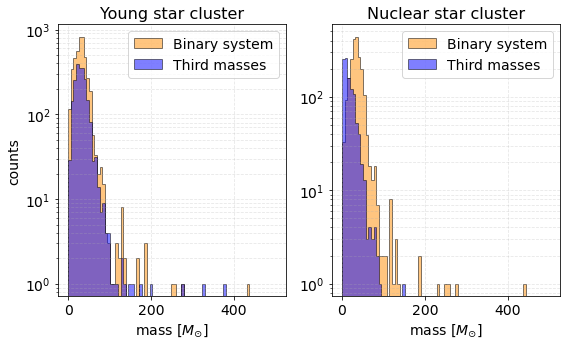

In [82]:
M_scale =  1#1.988e30 

##########exchange 0

# filter the dataframe in order to keep only exchange 0 simulations (young)
ex0_sim_y = df_y[df_y["event"] == "exchange0"]["simulation"].to_numpy()
ex0_y = data_ysc[data_ysc["simulation"].isin(ex0_sim_y)]

# arrays with masses of the tree black holes
BHs0_ex0_y = ex0_y[0::3]["m"].to_numpy()
BHs0_ex0_y = BHs0_ex0_y*M_scale

BHs1_ex0_y = ex0_y[1::3]["m"].to_numpy()
BHs1_ex0_y = BHs1_ex0_y*M_scale

BHs2_ex0_y = ex0_y[2::3]["m"].to_numpy()
BHs2_ex0_y = BHs2_ex0_y*M_scale

# filter the dataframe in order to keep only exchange 0 simulations (nuclear)
ex0_sim_n = df_n[df_n["event"] == "exchange0"]["simulation"].to_numpy()
ex0_n = data_ysc[data_ysc["simulation"].isin(ex0_sim_n)]

# arrays with masses of the tree black holes
BHs0_ex0_n = ex0_n[0::3]["m"].to_numpy()
BHs0_ex0_n = BHs0_ex0_n*M_scale

BHs1_ex0_n = ex0_n[1::3]["m"].to_numpy()
BHs1_ex0_n = BHs1_ex0_n*M_scale


BHs2_ex0_n = ex0_n[2::3]["m"].to_numpy()
BHs2_ex0_n = BHs2_ex0_n*M_scale


##########exchange 1

# filter the dataframe in order to keep only exchange 1 simulations (young)
ex1_sim_y = df_y[df_y["event"] == "exchange1"]["simulation"].to_numpy()
ex1_y = data_ysc[data_ysc["simulation"].isin(ex1_sim_y)]

# arrays with masses of the tree black holes
BHs0_ex1_y = ex1_y[0::3]["m"].to_numpy()
BHs0_ex1_y = BHs0_ex1_y*M_scale

BHs1_ex1_y = ex1_y[1::3]["m"].to_numpy()
BHs1_ex1_y = BHs1_ex1_y*M_scale

BHs2_ex1_y = ex1_y[2::3]["m"].to_numpy()
BHs2_ex1_y = BHs2_ex1_y*M_scale

# filter the dataframe in order to keep only exchange 1 simulations (nuclear)
ex1_sim_n = df_n[df_n["event"] == "exchange1"]["simulation"].to_numpy()
ex1_n = data_ysc[data_ysc["simulation"].isin(ex1_sim_n)]

# arrays with masses of the tree black holes
BHs0_ex1_n = ex1_n[0::3]["m"].to_numpy()
BHs0_ex1_n = BHs0_ex1_n*M_scale

BHs1_ex1_n = ex1_n[1::3]["m"].to_numpy()
BHs1_ex1_n = BHs1_ex1_n*M_scale

BHs2_ex1_n = ex1_n[2::3]["m"].to_numpy()
BHs2_ex1_n = BHs2_ex1_n*M_scale


size = 14
nbins = 80
bins = np.linspace(0, 500, nbins)
#bins = np.logspace(-1, 2.7, nbins)

fig, (ax0, ax1) = plt.subplots( figsize=(9.0, 5.0) , nrows=1, ncols=2)

# plot histogram of the first and second black holes for both exchange0 and exchange1 (young)
ax0.hist(np.concatenate((BHs0_ex0_y, BHs1_ex0_y, BHs0_ex1_y, BHs1_ex1_y)), bins = bins, histtype = "step", ec = "k",
         linewidth = 1, color = "darkorange", fill = True, alpha = 0.5, label = "Binary system")

# plot histogram of the third black hole for both exchange0 and exchange1 (young)
ax0.hist(np.concatenate((BHs2_ex0_y, BHs2_ex1_y)), bins = bins, histtype = "step", ec = "k",
         linewidth = 1, color = "blue", fill = "True", alpha = 0.5, label = "Third masses")
ax0.set_yscale("log")
ax0.set_title("Young star cluster", size = size + 2)
ax0.set_xlabel(r"mass [$M_{\odot}$]", size = size)
ax0.set_ylabel("counts", size = size)
ax0.grid(which = "both", alpha = 0.3, linestyle = "--")
ax0.tick_params(axis = "x", labelsize = size)
ax0.tick_params(axis = "y", labelsize = size)
ax0.legend(fontsize = size)

# plot histogram of the first and second black holes for both exchange0 and exchange1 (nuclear)
ax1.hist(np.concatenate((BHs0_ex0_n, BHs1_ex0_n, BHs0_ex1_n, BHs1_ex1_n)), bins = bins, histtype = "step", ec = "k",
         linewidth = 1, color = "darkorange", fill = "True", alpha = 0.5, label = "Binary system")

# plot histogram of the third black hole for both exchange0 and exchange1 (nuclear)
ax1.hist(np.concatenate((BHs2_ex0_n, BHs2_ex1_n)), bins = bins, histtype = "step", ec = "k",
         linewidth = 1, color = "blue", fill = "True", alpha = 0.5, label = "Third masses")

ax1.set_yscale("log")
ax1.set_title("Nuclear star cluster", size = size + 2)
ax1.set_xlabel(r"mass [$M_{\odot}$]", size = size)
#ax1.set_ylabel("counts", size = size)
ax1.grid(which = "both", alpha = 0.3, linestyle = "--")
ax1.tick_params(axis = "x", labelsize = size)
ax1.tick_params(axis = "y", labelsize = size)
ax1.legend(fontsize = size)
#ax1.set_facecolor('gainsboro')


plt.show()
fig.savefig("masses_ex.pdf", transparent = True, bbox_inches = 'tight', pad_inches = 0)

The plot above shows the comparison between the mass of the BHs composing the binary system and the mass of the third black hole before the exchange event, for both kind of clustes.

# exchanges (distributions at the final instant)

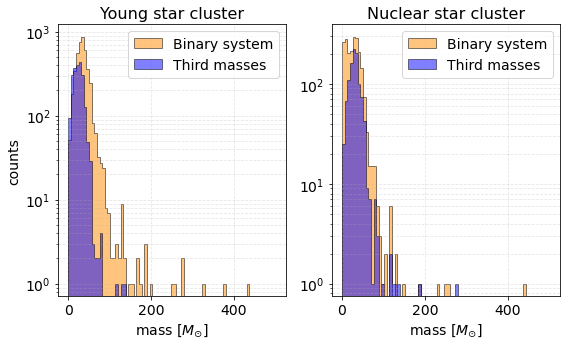

In [136]:
M_scale =  1#1.988e30 

##########exchange 0

# filter the dataframe in order to keep only exchange 0 simulations (young)
ex0_sim_y = df_y[df_y["event"] == "exchange0"]["simulation"].to_numpy()
ex0_y = data_ysc[data_ysc["simulation"].isin(ex0_sim_y)]

# arrays with masses of the tree black holes
BHs0_ex0_y = ex0_y[0::3]["m"].to_numpy()
BHs0_ex0_y = BHs0_ex0_y*M_scale

BHs1_ex0_y = ex0_y[1::3]["m"].to_numpy()
BHs1_ex0_y = BHs1_ex0_y*M_scale

BHs2_ex0_y = ex0_y[2::3]["m"].to_numpy()
BHs2_ex0_y = BHs2_ex0_y*M_scale

# filter the dataframe in order to keep only exchange 0 simulations (nuclear)
ex0_sim_n = df_n[df_n["event"] == "exchange0"]["simulation"].to_numpy()
ex0_n = data_ysc[data_ysc["simulation"].isin(ex0_sim_n)]

# arrays with masses of the tree black holes
BHs0_ex0_n = ex0_n[0::3]["m"].to_numpy()
BHs0_ex0_n = BHs0_ex0_n*M_scale

BHs1_ex0_n = ex0_n[1::3]["m"].to_numpy()
BHs1_ex0_n = BHs1_ex0_n*M_scale


BHs2_ex0_n = ex0_n[2::3]["m"].to_numpy()
BHs2_ex0_n = BHs2_ex0_n*M_scale


##########exchange 1

# filter the dataframe in order to keep only exchange 1 simulations (young)
ex1_sim_y = df_y[df_y["event"] == "exchange1"]["simulation"].to_numpy()
ex1_y = data_ysc[data_ysc["simulation"].isin(ex1_sim_y)]

# arrays with masses of the tree black holes
BHs0_ex1_y = ex1_y[0::3]["m"].to_numpy()
BHs0_ex1_y = BHs0_ex1_y*M_scale

BHs1_ex1_y = ex1_y[1::3]["m"].to_numpy()
BHs1_ex1_y = BHs1_ex1_y*M_scale

BHs2_ex1_y = ex1_y[2::3]["m"].to_numpy()
BHs2_ex1_y = BHs2_ex1_y*M_scale

# filter the dataframe in order to keep only exchange 1 simulations (nuclear)
ex1_sim_n = df_n[df_n["event"] == "exchange1"]["simulation"].to_numpy()
ex1_n = data_ysc[data_ysc["simulation"].isin(ex1_sim_n)]

# arrays with masses of the tree black holes
BHs0_ex1_n = ex1_n[0::3]["m"].to_numpy()
BHs0_ex1_n = BHs0_ex1_n*M_scale

BHs1_ex1_n = ex1_n[1::3]["m"].to_numpy()
BHs1_ex1_n = BHs1_ex1_n*M_scale

BHs2_ex1_n = ex1_n[2::3]["m"].to_numpy()
BHs2_ex1_n = BHs2_ex1_n*M_scale


size = 14
nbins = 80
bins = np.linspace(0, 500, nbins)
#bins = np.logspace(-1, 2.7, nbins)

fig, (ax0, ax1) = plt.subplots( figsize=(9.0, 5.0) , nrows=1, ncols=2)

# plot histogram of the first and second black holes for both exchange0 and exchange1 (young)
ax0.hist(np.concatenate((BHs1_ex0_y, BHs2_ex0_y, BHs0_ex1_y, BHs2_ex1_y)), bins = bins, histtype = "step", ec = "k",
         linewidth = 1, color = "darkorange", fill = True, alpha = 0.5, label = "Binary system")

# plot histogram of the third black hole for both exchange0 and exchange1 (young)
ax0.hist(np.concatenate((BHs0_ex0_y, BHs1_ex1_y)), bins = bins, histtype = "step", ec = "k",
         linewidth = 1, color = "blue", fill = "True", alpha = 0.5, label = "Third masses")
ax0.set_yscale("log")
ax0.set_title("Young star cluster", size = size + 2)
ax0.set_xlabel(r"mass [$M_{\odot}$]", size = size)
ax0.set_ylabel("counts", size = size)
ax0.grid(which = "both", alpha = 0.3, linestyle = "--")
ax0.tick_params(axis = "x", labelsize = size)
ax0.tick_params(axis = "y", labelsize = size)
ax0.legend(fontsize = size)

# plot histogram of the first and second black holes for both exchange0 and exchange1 (nuclear)
ax1.hist(np.concatenate((BHs1_ex0_n, BHs2_ex0_n, BHs0_ex1_n, BHs2_ex1_n)), bins = bins, histtype = "step", ec = "k",
         linewidth = 1, color = "darkorange", fill = "True", alpha = 0.5, label = "Binary system")

# plot histogram of the third black hole for both exchange0 and exchange1 (nuclear)
ax1.hist(np.concatenate((BHs0_ex0_n, BHs1_ex1_n)), bins = bins, histtype = "step", ec = "k",
         linewidth = 1, color = "blue", fill = "True", alpha = 0.5, label = "Third masses")

ax1.set_yscale("log")
ax1.set_title("Nuclear star cluster", size = size + 2)
ax1.set_xlabel(r"mass [$M_{\odot}$]", size = size)
#ax1.set_ylabel("counts", size = size)
ax1.grid(which = "both", alpha = 0.3, linestyle = "--")
ax1.tick_params(axis = "x", labelsize = size)
ax1.tick_params(axis = "y", labelsize = size)
ax1.legend(fontsize = size)
#ax1.set_facecolor('gainsboro')


plt.show()
fig.savefig("masses_ex_f.pdf", transparent = True, bbox_inches = 'tight', pad_inches = 0)

The plot above shows the comparison between the mass of the BHs composing the binary system and the mass of the third black hole after the exchange event, for both kind of clusters.

## Kolmogorov-Smirnov test

The Kolmogorov-Smirnov test is a statistical test that estimates the similarity between two distributions. In other words, it is useful in order to check is two empirical distributions are the same. Furthermore, it can be used for comparing an empirical distribution with a theoretical one or two empirical distributions. So, given two distributions, the idea is to compare the corresponding CDFs. Recall that, for a random variable $X$, its Cumulative Density Function $F$ is just the probability that the random variable is less or equale to a certain value:
\begin{equation}
 F(k) = Prob(X \leq k)
\end{equation}
In the case of empirical data, where one has to deal with finite datasets, the empirical CDF can be defined as follows:
\begin{equation}
\frac{1}{n} \sum_{i} \mathcal{I}\left(x_{i}<a\right),
\end{equation}
where $\mathcal{I}$ is a function that returns $1$ if the condition is satisfied and $0$ otherwise. <br>
Given two empirical distributions $F_n^1$ and $F_n^2$, the statistic $D_n$ of the Kolmogorov test is:
\begin{equation}
D_{n}=\max _{x}\left|F_{n}^{1}(x)-F_{n}^{2}(x)\right|
\end{equation}

## Comparison of initial distributions vs. final distributions for both kind of clusters

### Young star cluster

In [128]:
print(stats.ks_2samp(np.concatenate((BHs0_ex0_y + BHs1_ex0_y, BHs0_ex1_y + BHs1_ex1_y)),
                     np.concatenate((BHs1_ex0_y + BHs2_ex0_y, BHs0_ex1_y + BHs2_ex1_y ))))

KstestResult(statistic=0.14898632720414898, pvalue=6.069284275523815e-21)


These are the results of the comparison between the initial total mass and the final total mass (of the binary system) distributions for the young star cluster. Since the statistic is not so small, we can reject the null hypothesis.

### Nuclear star cluster

In [129]:
print(stats.ks_2samp(np.concatenate((BHs0_ex0_n + BHs1_ex0_n, BHs0_ex1_n + BHs1_ex1_n)),
                     np.concatenate((BHs1_ex0_n + BHs2_ex0_n, BHs0_ex1_n + BHs2_ex1_n ))))

KstestResult(statistic=0.3403846153846154, pvalue=8.63886151531234e-54)


These are the results of the comparison between the initial total mass and the final total mass (of the binary system) distributions for the nuclear star cluster. Since the statistic is not so small, we can reject the null hypothesis.

## Different types of exchange

### Exchange 0

In [143]:
print(stats.ks_2samp(BHs0_ex0_y + BHs1_ex0_y,
                     BHs1_ex0_y + BHs2_ex0_y))

KstestResult(statistic=0.060948081264108354, pvalue=0.3833743336744905)


The above results show the comparison between the initial total mass distribution and the final total mass distribution of the binary system in the case of an exchange0 (i.e. an exchange where the intruder replaces the first black hole) and a young star cluster. It is interesting to see that here the statistic value is very small, thus the two distributions are similar.

In [145]:
print(stats.ks_2samp(BHs0_ex0_n + BHs1_ex0_n,
                     BHs1_ex0_n + BHs2_ex0_n))

KstestResult(statistic=0.5910543130990416, pvalue=4.590891291257851e-51)


The above results show the comparison between the initial total mass distribution and the final total mass distribution of the binary system in the case of an exchange0(i.e. an exchange where the intruder replaces the second black hole) and a nuclear star cluster. Here, since the statistic value is not so small, the two distributions can be considered different.

### Exchange 1

In [146]:
print(stats.ks_2samp(BHs0_ex1_y + BHs1_ex1_y,
                     BHs1_ex1_y + BHs2_ex1_y))

KstestResult(statistic=0.21811680572109654, pvalue=2.297654382750704e-35)


The above results show the comparison between the initial total mass distribution and the final total mass distribution of the binary system in the case of an exchange1(i.e. an exchange where the intruder replaces the second black hole) and a young star cluster. Here, since the statistic value is not so small, the two distributions can be considered different.

In [147]:
print(stats.ks_2samp(BHs0_ex1_n + BHs1_ex1_n,
                     BHs1_ex1_n + BHs2_ex1_n))

KstestResult(statistic=0.5680880330123796, pvalue=1.4099155005801489e-108)


The above results show the comparison between the initial total mass distribution and the final total mass distribution of the binary system in the case of an exchange1(i.e. an exchange where the intruder replaces the second black hole) and a nuclear star cluster. Here, since the statistic value is not so small, the two distributions can be considered different.

## Comparison of final distribution of YSCs vs. final distribution of NSCs

In [131]:
print(stats.ks_2samp(np.concatenate((BHs1_ex0_y + BHs2_ex0_y, BHs0_ex1_y + BHs2_ex1_y )),
                     np.concatenate((BHs1_ex0_n + BHs2_ex0_n, BHs0_ex1_n + BHs2_ex1_n ))))

KstestResult(statistic=0.3166041054654916, pvalue=1.0556245928348593e-62)


The above results show the comparison between the fina total mass distribution for YSCs and the final total mass distribution of NSCs independently of the type of exchange. Here, again, since the statistic value is quite high and the pvalue is very small, we can reject the hypothesis that the two distributions are the same.

## Ionization

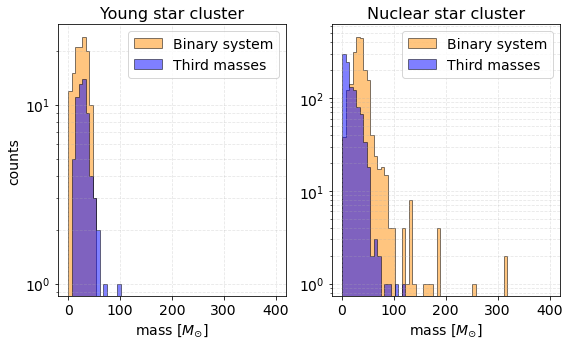

In [88]:
M_scale =  1#1.988e30 


# filter the dataframe in order to keep only ionization simulations (young)
i_sim_y = df_y[df_y["event"] == "ionization"]["simulation"].to_numpy()
i_y = data_ysc[data_ysc["simulation"].isin(i_sim_y)]

# arrays with masses of the tree black holes
BHs0_i_y = i_y[0::3]["m"].to_numpy()*M_scale
BHs1_i_y = i_y[1::3]["m"].to_numpy()*M_scale
BHs2_i_y = i_y[2::3]["m"].to_numpy()*M_scale

# filter the dataframe in order to keep only ionization simulations (nuclear)
i_sim_n = df_n[df_n["event"] == "ionization"]["simulation"].to_numpy()
i_n = data_ysc[data_ysc["simulation"].isin(i_sim_n)]
BHs0_i_n = i_n[0::3]["m"].to_numpy()*M_scale
BHs1_i_n = i_n[1::3]["m"].to_numpy()*M_scale
BHs2_i_n = i_n[2::3]["m"].to_numpy()*M_scale



size = 14
nbins = 60
bins = np.linspace(0, 400, nbins)
bins1 = np.linspace(0, 200, nbins)

fig, (ax0, ax1) = plt.subplots( figsize=(9.0, 5.0) , nrows=1, ncols=2)

# plot histogram of the first and second black hole for "ionization" event (young)
ax0.hist(np.concatenate((BHs0_i_y, BHs1_i_y)), bins = bins, histtype = "step", ec = "k",
         linewidth = 1, color = "darkorange", fill = True, alpha = 0.5, label = "Binary system")
ax0.hist(BHs2_i_y, bins = bins, histtype = "step", ec = "k",
         linewidth = 1, color = "blue", fill = "True", alpha = 0.5, label = "Third masses")
ax0.set_yscale("log")
ax0.set_title("Young star cluster", size = size + 2)
ax0.set_xlabel(r"mass [$M_{\odot}$]", size = size)
ax0.set_ylabel("counts", size = size)
ax0.grid(which = "both", alpha = 0.3, linestyle = "--")
ax0.tick_params(axis = "x", labelsize = size)
ax0.tick_params(axis = "y", labelsize = size)
ax0.legend(fontsize = size)

# plot histogram of the first and second black hole for "ionization" event (nuclear)
ax1.hist(np.concatenate((BHs0_i_n, BHs1_i_n)), bins = bins, histtype = "step", ec = "k",
         linewidth = 1, color = "darkorange", fill = "True", alpha = 0.5, label = "Binary system")


ax1.hist(BHs2_i_n, bins = bins, histtype = "step", ec = "k",
         linewidth = 1, color = "blue", fill = "True", alpha = 0.5, label = "Third masses")
ax1.set_yscale("log")
ax1.set_title("Nuclear star cluster", size = size + 2)
ax1.set_xlabel(r"mass [$M_{\odot}$]", size = size)
ax1.grid(which = "both", alpha = 0.3, linestyle = "--")
ax1.tick_params(axis = "x", labelsize = size)
ax1.tick_params(axis = "y", labelsize = size)
ax1.legend(fontsize = size)


plt.show()
fig.savefig("masses_i.pdf", transparent = True, bbox_inches = 'tight', pad_inches = 0)

The plot above shows the comparison between the mass of the BHs composing the binary system and the third mass for a ionization event and for both kind of clusters.

# Semi-Major axis distribution

# IMPORT DATA

In [14]:
################################# YSC

# import file to dataframe (initial)
data_sma_y_h = pd.read_csv("YSC_semi_major_axis_head.dat", sep=",", header=0)

# create a new column with the number of the simulation
data_sma_y_h['simulation'] = [(i+1) for i in range(len(data_sma_y_h))]

# import file to dataframe (tail)
data_sma_y_t = pd.read_csv("YSC_semi_major_axis_tail.dat", sep=",", header=0)

# create a new column with the number of the simulation
data_sma_y_t['simulation'] = [(i+1) for i in range(len(data_sma_y_t))]


################################# NSC

# import file to dataframe (initial)
data_sma_n_h = pd.read_csv("NSC_semi_major_axis_head.dat", sep=",", header=0)

# create a new column with the number of the simulation
data_sma_n_h['simulation'] = [(i+1) for i in range(len(data_sma_n_h))]

# import file to dataframe (tail)
data_sma_n_t = pd.read_csv("NSC_semi_major_axis_tail.dat", sep=",", header=0)

# create a new column with the number of the simulation
data_sma_n_t['simulation'] = [(i+1) for i in range(len(data_sma_n_t))]


## Exchanges

In [29]:
L_scale = 1#3.08567758130573e16 

#############exchange 0
# filter dataframe in order to keep only exchange0 simulations (young)
sma_ex0_y_h = data_sma_y_h[data_sma_y_h["simulation"].isin(ex0_sim_y)]
sma_ex0_y_t = data_sma_y_t[data_sma_y_t["simulation"].isin(ex0_sim_y)]

# filter dataframe in order to keep only exchange0 simulations (nuclear)
sma_ex0_n_h = data_sma_n_h[data_sma_y_h["simulation"].isin(ex0_sim_n)]
sma_ex0_n_t = data_sma_n_t[data_sma_y_t["simulation"].isin(ex0_sim_n)]

# arrays with s. m. axis data
sma_ex0_y_h = sma_ex0_y_h["A"].to_numpy()
sma_ex0_y_h = sma_ex0_y_h[sma_ex0_y_h != 9999]
sma_ex0_y_h = sma_ex0_y_h*L_scale

sma_ex0_y_t = sma_ex0_y_t["A"].to_numpy()
sma_ex0_y_t = sma_ex0_y_t[sma_ex0_y_t != 9999]
sma_ex0_y_t = sma_ex0_y_t*L_scale

sma_ex0_n_h = sma_ex0_n_h["A"].to_numpy()
sma_ex0_n_h = sma_ex0_n_h[sma_ex0_n_h != 9999]
sma_ex0_n_h = sma_ex0_n_h*L_scale

sma_ex0_n_t = sma_ex0_n_t["A"].to_numpy()
sma_ex0_n_t = sma_ex0_n_t[sma_ex0_n_t != 9999]
sma_ex0_n_t = sma_ex0_n_t*L_scale

#############exchange 1
# filter dataframe in order to keep only exchange1 simulations (young)
sma_ex1_y_h = data_sma_y_h[data_sma_y_h["simulation"].isin(ex1_sim_y)]
sma_ex1_y_t = data_sma_y_t[data_sma_y_t["simulation"].isin(ex1_sim_y)]

# filter dataframe in order to keep only exchange1 simulations (nuclear)
sma_ex1_n_h = data_sma_n_h[data_sma_y_h["simulation"].isin(ex1_sim_n)]
sma_ex1_n_t = data_sma_n_t[data_sma_y_t["simulation"].isin(ex1_sim_n)]

# arrays with s. m. axis data
sma_ex1_y_h = sma_ex1_y_h["A"].to_numpy()
sma_ex1_y_h = sma_ex1_y_h[sma_ex1_y_h != 9999]
sma_ex1_y_h = sma_ex1_y_h*L_scale

sma_ex1_y_t = sma_ex1_y_t["A"].to_numpy()
sma_ex1_y_t = sma_ex1_y_t[sma_ex1_y_t != 9999]
sma_ex1_y_t = sma_ex1_y_t*L_scale


sma_ex1_n_h = sma_ex1_n_h["A"].to_numpy()
sma_ex1_n_h = sma_ex1_n_h[sma_ex1_n_h != 9999]
sma_ex1_n_h = sma_ex1_n_h*L_scale

sma_ex1_n_t = sma_ex1_n_t["A"].to_numpy()
sma_ex1_n_t = sma_ex1_n_t[sma_ex1_n_t != 9999]
sma_ex1_n_t = sma_ex1_n_t*L_scale

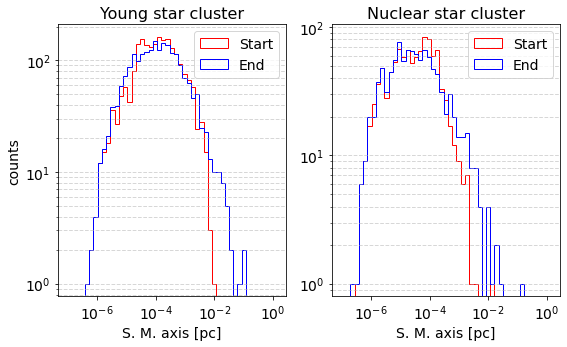

In [95]:
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(9, 5))
#fig.suptitle("Exchanges", size = 25, weight = "bold")
size = 14
nbins = 50
bins1 = np.linspace(0, int(3.5e15), nbins)
bins2 = np.linspace(0, int(1.5e15), nbins)
binsl1 = np.logspace(-7, 0.1, nbins)
binsl2 = np.logspace(-7, 0.1, nbins)

##########young
#plot histogram of s.m. distributions for the start of the simulation (exchange 0 and exchange 1)
ax0.hist(np.concatenate((sma_ex0_y_h, sma_ex1_y_h)), bins = binsl1, color = "red", histtype = "step", label = "Start")

#plot histogram of s.m. distributions for the tail of the simulation (exchange 0 and exchange 1)
ax0.hist(np.concatenate((sma_ex0_y_t, sma_ex1_y_t)), bins = binsl1, color = "blue", histtype = "step", label = "End")
ax0.set_yscale("log")
ax0.set_xscale("log")
ax0.grid(which = "both", axis = "y", alpha = 0.5, linewidth = 1, linestyle = "--")
ax0.tick_params(axis = "x", labelsize = size)
ax0.tick_params(axis = "y", labelsize = size)
ax0.set_title("Young star cluster", size = size + 2)
ax0.set_xlabel("S. M. axis [pc]", size = size)
ax0.set_ylabel("counts", size = size)
ax0.legend(fontsize = size, loc = "upper right")


##########nuclear
#plot histogram of s.m. distributions for the start of the simulation (exchange 0 and exchange 1)
ax1.hist(np.concatenate((sma_ex0_n_h, sma_ex1_n_h)), bins = binsl2, color = "red", histtype = "step", label = "Start")

#plot histogram of s.m. distributions for the tail of the simulation (exchange 0 and exchange 1)
ax1.hist(np.concatenate((sma_ex0_n_t, sma_ex1_n_t)), bins = binsl2, color = "blue", histtype = "step", label = "End")
ax1.set_yscale("log")
ax1.set_xscale("log")
ax1.tick_params(axis = "x", labelsize = size)
ax1.tick_params(axis = "y", labelsize = size)
ax1.grid(which = "both", axis = "y", alpha = 0.5, linewidth = 1, linestyle = "--")
ax1.set_title("Nuclear star cluster", size = size + 2)
ax1.set_xlabel("S. M. axis [pc]", size = size)
#ax1.set_ylabel("counts", size = size)
ax1.legend(fontsize = size, loc = "upper right")
plt.show()

#fig.savefig("sma_ex.pdf", transparent = True, bbox_inches = 'tight', pad_inches = 0)

Plot showing the distributions of the semi major axis at the beginning and at the end of the simulation for an exchange event. The plot is represented in a double log scale.

## Kolmogorov results for "exchange"

### Compare initial distribution vs. final distribution for young star cluster

In [148]:
print(stats.ks_2samp(np.concatenate((sma_ex0_y_h, sma_ex1_y_h)), np.concatenate((sma_ex0_y_t, sma_ex1_y_t)) ))

KstestResult(statistic=0.0594059405940594, pvalue=0.0011197578947438128)


### Compare initial distribution vs. final distribution for nuclear star cluster

In [106]:
print(stats.ks_2samp(np.concatenate((sma_ex0_n_h, sma_ex1_n_h)), np.concatenate((sma_ex0_n_t, sma_ex1_n_t))))

KstestResult(statistic=0.06634615384615385, pvalue=0.020529388318270156)


### Compare initial distribution of YSC vs initial distribution of NSC

In [97]:
print(stats.ks_2samp(np.concatenate((sma_ex0_y_h, sma_ex1_y_h)), np.concatenate((sma_ex0_n_h, sma_ex1_n_h))))

KstestResult(statistic=0.28613770717731113, pvalue=4.4565233306766787e-51)


### Compare final distribution of YSC vs. final distribution of NSC

In [98]:
print(stats.ks_2samp(np.concatenate((sma_ex0_y_t, sma_ex1_y_t)), np.concatenate((sma_ex0_n_t, sma_ex1_n_t))))

KstestResult(statistic=0.2655781924346281, pvalue=6.000728095467649e-44)


## Fly-by

In [107]:
# filter dataframe in order to keep only fly-by simulations (young)
sma_fl_y_h = data_sma_y_h[data_sma_y_h["simulation"].isin(fl_sim_y)]
sma_fl_y_t = data_sma_y_t[data_sma_y_t["simulation"].isin(fl_sim_y)]

# filter dataframe in order to keep only exchange0 simulations (nuclear)
sma_fl_n_h = data_sma_n_h[data_sma_y_h["simulation"].isin(fl_sim_n)]
sma_fl_n_t = data_sma_n_t[data_sma_y_t["simulation"].isin(fl_sim_n)]



In [108]:
# arrays with s. m. axis data
sma_fl_y_h = sma_fl_y_h["A"].to_numpy()
sma_fl_y_h = sma_fl_y_h[sma_fl_y_h != 9999]
sma_fl_y_h = sma_fl_y_h*L_scale

sma_fl_y_t = sma_fl_y_t["A"].to_numpy()
sma_fl_y_t = sma_fl_y_t[sma_fl_y_t != 9999]
sma_fl_y_t = sma_fl_y_t*L_scale

sma_fl_n_h = sma_fl_n_h["A"].to_numpy()
sma_fl_n_h = sma_fl_n_h[sma_fl_n_h != 9999]
sma_fl_n_h = sma_fl_n_h*L_scale

sma_fl_n_t = sma_fl_n_t["A"].to_numpy()
sma_fl_n_t = sma_fl_n_t[sma_fl_n_t != 9999]
sma_fl_n_t = sma_fl_n_t*L_scale

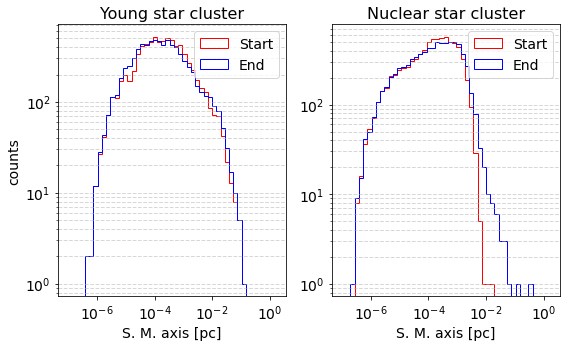

In [109]:


fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(9, 5))
#fig.suptitle("Exchanges", size = 25, weight = "bold")
size = 14
nbins = 50
bins1 = np.linspace(0, int(3.5e15), nbins)
bins2 = np.linspace(0, int(1.5e15), nbins)
binsl1 = np.logspace(-7, 0.2, nbins)
binsl2 = np.logspace(-7, 0.2, nbins)

# plot histogram of initial and final distributions of young star cluster
ax0.hist(sma_fl_y_h, bins = binsl1, color = "red", histtype = "step", label = "Start")
ax0.hist(sma_fl_y_t, bins = binsl1, color = "blue", histtype = "step", label = "End")
ax0.set_yscale("log")
ax0.set_xscale("log")
ax0.grid(which = "both", axis = "y", alpha = 0.5, linewidth = 1, linestyle = "--")
ax0.tick_params(axis = "x", labelsize = size)
ax0.tick_params(axis = "y", labelsize = size)
ax0.set_title("Young star cluster", size = size + 2)
ax0.set_xlabel("S. M. axis [pc]", size = size)
ax0.set_ylabel("counts", size = size)
ax0.legend(fontsize = size)

# plot histogram of initial and final distributions of nuclear star cluster
ax1.hist(sma_fl_n_h, bins = binsl2, color = "red", histtype = "step", label = "Start")
ax1.hist(sma_fl_n_t, bins = binsl2, color = "blue", histtype = "step", label = "End")
ax1.set_yscale("log")
ax1.set_xscale("log")
ax1.tick_params(axis = "x", labelsize = size)
ax1.tick_params(axis = "y", labelsize = size)
ax1.grid(which = "both", axis = "y", alpha = 0.5, linewidth = 1, linestyle = "--")
ax1.set_title("Nuclear star cluster", size = size + 2)
ax1.set_xlabel("S. M. axis [pc]", size = size)
#ax1.set_ylabel("counts", size = size)
ax1.legend(fontsize = size)
plt.show()

#fig.savefig("sma_fl.pdf", transparent = True, bbox_inches = 'tight', pad_inches = 0)

Plot showing the distributions of the semi major axis at the beginning and at the end of the simulation for a fly-by event. The plot is represented in a double log scale.

## Kolmogorov results for "fly-by"

### Compare initial distribution vs. final distribution for YSC

In [110]:
print(stats.ks_2samp(sma_fl_y_h, sma_fl_y_t) )

KstestResult(statistic=0.041223578836812394, pvalue=4.766611487028244e-06)


### Compare initial distribution vs. final distribution for YSC

In [111]:
print(stats.ks_2samp(sma_fl_n_h, sma_fl_n_t) )

KstestResult(statistic=0.04389505549949546, pvalue=4.626583106020075e-07)


### Compare final distribution of YSC vs. final distribution of NSC

In [112]:
print(stats.ks_2samp(sma_fl_y_t, sma_fl_n_t) )

KstestResult(statistic=0.06791348935747976, pvalue=5.039367408069166e-16)
